
# Introduction
There are several methods that can be used to process data.<br>
These methods include the following:

    1. Data Cleaning.
* Purpose: Handle missing values, duplicates, or inconsistent data.
* Examples: filling missing prices with the median, removing rows with null values, or correcting typos in the brand names.
  
    2. Data Transformation
* Purpose: Modify the data format for better usability.
* Examples: converting price columns to a standard currency, encoding categorical data like car brands, or normalizing numerical features.
  
    3. Data Aggregation
* Purpose: Summarize data for analysis.
* Examples: Grouping data by car brand and calculating average prices or total sales.
  
    4. Feature Engineering
* Purpose: Create new meaningful features from existing data.
* Examples: Adding a "price per horsepower" column or creating a binary feature like "is_luxury_brand.
  
    5. Outlier Detection and Handling
* Purpose: Identify and address data points that deviate significantly from the rest.
* Examples: Removing cars with unrealistically low or high prices, such as outliers using the IQR (Interquartile Range) method.
  
    6. Data Filtering
* Purpose: Select or exclude specific subsets of the data.
* Examples: Filtering cars manufactured after 2015 or selecting only SUVs.
  
    7. Data Visualization
* Purpose: Explore patterns and relationships visually.
* Examples: Plotting the relationship between price and mileage using scatter plots or creating bar plots of average prices by brand.


# Step by step to process the dataset (Car price Dataset)
## Step 1: Download the Dataset
1. Visit an online source like Kaggle.
2. Search for dataset of your choice. I chose Car Price dataset from kaggle
3. Download the dataset in .csv or any supported format.
4. Save the file to your working directory.

## Step 2: Load the dataset into jupyter notebook
1. importing neccessary files 

In [4]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the dataset

In [6]:
# Reade the data from the stored directory
data=pd.read_csv("/home/compess/Desktop/Principle of Data science/carpricedatset.zip")
# Methode to diaplay the first 5 rows
data.head() 

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


## Step 3: Data Cleaning
* Objective: Handle missing or duplicate data.
1. Checking for missing values

In [8]:
# Function to count all the missing values
data.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

2. Handle missing values
    This involves filling or dropping columns with missing values. <br>
    Since all columns have 0 missing values, it mean there are no missing values, so will skip this part.
   the method used to handle missing givien an example of price is as the one <br> data['price'].fillna(data['price'].median(), inplace=True)  # Fill missing prices with the median


3. Handling duplicate values

In [11]:
duplicate = data.duplicated()
# print the result of check for duplicate
print(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


The return value is __false__ meaning there are no duplicate values

## Step 4: Data Transformation
__Objective:__ Modify data for better usability.
    Convert categorical data (e.g., "brand") into numerical form:

1. To convert the categorical data (e.g., "Brand", "Fuel_Type", "Transmission") into numerical form, we can use encoding techniques such as Label Encoding or One-Hot Encoding. Here's how to handle it step-by-step:

        1. Label Encoding:
            Use LabelEncoder to convert categories into numerical labels (useful for ordinal or a single column of categories).

In [15]:
from sklearn.preprocessing import LabelEncoder
# Label encoding for "Brand", "Fuel_Type", and "Transmission"
label_encoder = LabelEncoder()
data['Brand'] = label_encoder.fit_transform(data['Brand'])
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

print(data)

      Brand     Model  Year  Engine_Size  Fuel_Type  Transmission  Mileage  \
0         6       Rio  2020          4.2          0             1   289944   
1         2    Malibu  2012          2.0          2             0     5356   
2         7       GLA  2020          4.2          0             0   231440   
3         0        Q5  2023          2.0          1             1   160971   
4         9      Golf  2003          2.6          2             2   286618   
...     ...       ...   ...          ...        ...           ...      ...   
9995      6    Optima  2004          3.7          0             2     5794   
9996      2    Impala  2002          1.4          1             0   168000   
9997      1  3 Series  2010          3.0          3             0    86664   
9998      3  Explorer  2002          1.4          2             0   225772   
9999      9    Tiguan  2001          2.1          0             1   157882   

      Doors  Owner_Count  Price  
0         3            5   85

2. Normalize numerical features <br>
    Normalizing numerical features scales them to a smaller range, typically between 0 and 1, to improve the performance of many machine learning algorithms <br>
    
       Step 1: Identify Numerical Columns<br>
            From my dataset, the numerical columns are:
            * Year
            * Engine_Size
            * Mileage
            * Doors
            * Owner_Count
            * Price
     Step 2: Normalize the Data<br>
        we can normalize numerical features using Min-Max Scaling, which transforms the values to a range between 0 and 1.

  

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("Normalized Data:")
data.to_csv('normalized_data.csv', index=False)

print(data)

Normalized Data:
      Brand     Model      Year  Engine_Size  Fuel_Type  Transmission  \
0         6       Rio  0.869565        0.800          0             1   
1         2    Malibu  0.521739        0.250          2             0   
2         7       GLA  0.869565        0.800          0             0   
3         0        Q5  1.000000        0.250          1             1   
4         9      Golf  0.130435        0.400          2             2   
...     ...       ...       ...          ...        ...           ...   
9995      6    Optima  0.173913        0.675          0             2   
9996      2    Impala  0.086957        0.100          1             0   
9997      1  3 Series  0.434783        0.500          3             0   
9998      3  Explorer  0.086957        0.100          2             0   
9999      9    Tiguan  0.043478        0.275          0             1   

       Mileage     Doors  Owner_Count     Price  
0     0.966648  0.333333         1.00  0.398810  
1     

 Alternative: Use Standardization

   
If we want to normalize to a standard normal distribution (mean = 0, std = 1), we can use StandardScaler instead of MinMaxScaler



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print (data)


## Step 5: Outlier Detection and Handling
Outlier detection and handling is crucial for improving model performance and ensuring data quality.

    Outlier detection and handling is crucial for improving model performance and ensuring data quality. 
    
    Here's a step-by-step approach to detect and handle outliers in your dataset:

### Step 1: Identify Outliers
#### 1.1.Using Summary Statistics
                Use the Interquartile Range (IQR) method to detect outliers:

Calculate Q1 (25th percentile) and Q3 (75th percentile).
Compute the IQR: IQR = Q3 - Q1.
Define lower and upper bounds:

Lower Bound = 𝑄1−1.5⋅IQR

Lower Bound = Q1 − 1.5 ⋅ IQR


In [21]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['number'])

# Detect outliers using IQR
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = (numerical_columns < lower_bound) | (numerical_columns > upper_bound)
print("Outliers detected:")
print(outliers)


Outliers detected:
      Brand   Year  Engine_Size  Fuel_Type  Transmission  Mileage  Doors  \
0     False  False        False      False         False    False  False   
1     False  False        False      False         False    False  False   
2     False  False        False      False         False    False  False   
3     False  False        False      False         False    False  False   
4     False  False        False      False         False    False  False   
...     ...    ...          ...        ...           ...      ...    ...   
9995  False  False        False      False         False    False  False   
9996  False  False        False      False         False    False  False   
9997  False  False        False      False         False    False  False   
9998  False  False        False      False         False    False  False   
9999  False  False        False      False         False    False  False   

      Owner_Count  Price  
0           False  False  
1           Fa

            1.2. Using Visualization
                Visualize the data to detect outliers:

                Boxplot: Highlights values outside the whiskers as outliers.
                Histogram/Scatterplot: Helps identify extreme values.

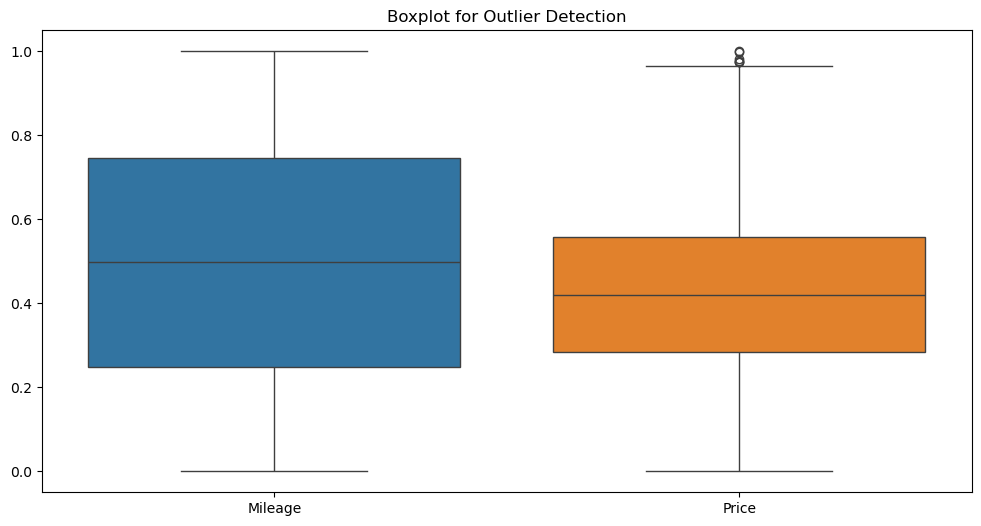

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Mileage', 'Price']])
plt.title("Boxplot for Outlier Detection")
plt.show()


### Step 2: Handle Outliers
    There are several methods to handle outliers:
 #### 2.1. Remove Outliers
        If the outliers are errors or don't contribute to the model:



Data after removing outliers:
      Brand     Model      Year  Engine_Size  Fuel_Type  Transmission  \
0         6       Rio  0.869565        0.800          0             1   
1         2    Malibu  0.521739        0.250          2             0   
2         7       GLA  0.869565        0.800          0             0   
3         0        Q5  1.000000        0.250          1             1   
4         9      Golf  0.130435        0.400          2             2   
...     ...       ...       ...          ...        ...           ...   
9995      6    Optima  0.173913        0.675          0             2   
9996      2    Impala  0.086957        0.100          1             0   
9997      1  3 Series  0.434783        0.500          3             0   
9998      3  Explorer  0.086957        0.100          2             0   
9999      9    Tiguan  0.043478        0.275          0             1   

       Mileage     Doors  Owner_Count     Price  
0     0.966648  0.333333         1.00  0.39

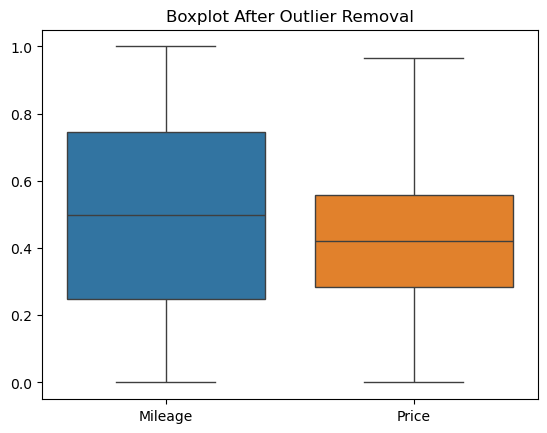

In [25]:
# Compute bounds for numeric columns
numerical_columns = data.select_dtypes(include=['number'])
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows with outliers in numeric columns
outliers = ((numerical_columns < lower_bound) | (numerical_columns > upper_bound))

# Remove rows with outliers
data_no_outliers = data[~outliers.any(axis=1)]

# Display the result
print("Data after removing outliers:")
print(data_no_outliers)

# Visualize boxplot for numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data_no_outliers[['Mileage', 'Price']])
plt.title("Boxplot After Outlier Removal")
plt.show()




Outliers detected (True indicates an outlier):
      Brand   Year  Engine_Size  Fuel_Type  Transmission  Mileage  Doors  \
0     False  False        False      False         False    False  False   
1     False  False        False      False         False    False  False   
2     False  False        False      False         False    False  False   
3     False  False        False      False         False    False  False   
4     False  False        False      False         False    False  False   
...     ...    ...          ...        ...           ...      ...    ...   
9995  False  False        False      False         False    False  False   
9996  False  False        False      False         False    False  False   
9997  False  False        False      False         False    False  False   
9998  False  False        False      False         False    False  False   
9999  False  False        False      False         False    False  False   

      Owner_Count  Price  
0           F

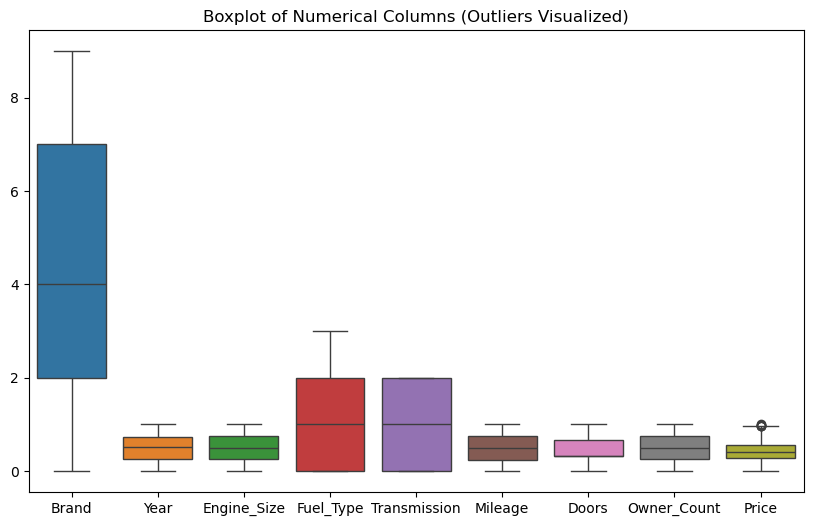

Outliers handled successfully!


In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your actual data)
# data = pd.read_csv('your_data.csv')

# Select only numerical columns
numerical_columns = data.select_dtypes(include=['number'])

# Detect outliers using IQR
Q1 = numerical_columns.quantile(0.25)  # First quartile
Q3 = numerical_columns.quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers (Boolean DataFrame indicating True for outliers)
outliers = (numerical_columns < lower_bound) | (numerical_columns > upper_bound)

# Display outliers
print("Outliers detected (True indicates an outlier):")
print(outliers)

# Optional: Visualize the outliers using a boxplot for each numeric column
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_columns)
plt.title("Boxplot of Numerical Columns (Outliers Visualized)")
plt.show()

# Handle outliers (Optional)
# You can remove the outliers or replace them with a specific value

# Option 1: Remove rows with outliers
data_no_outliers = data[~outliers.any(axis=1)]

# Option 2: Cap/floor outliers to the boundaries
data_capped = numerical_columns.apply(
    lambda col: col.clip(lower=lower_bound[col.name], upper=upper_bound[col.name])
)

# Replace the original numerical columns with the capped data
data[numerical_columns.columns] = data_capped

print("Outliers handled successfully!")


# Step 6: Data Aggregation 
Data aggregation is the process of combining multiple rows of data to form a summary or group-based representation. It helps in simplifying the dataset, reducing dimensionality, and providing insights into key trends or patterns by grouping the data based on one or more features.

## Common Use Cases for Data Aggregation:
1. Summarizing data: Combine data to calculate totals, averages, or other statistical summaries.
2. Group-based analysis: Analyze data based on categories, such as finding the average sales per product category or the total revenue per store.
3. Time series aggregation: Aggregate data by time periods (e.g., daily, monthly, yearly).

  ## Methods of Data Aggregation:
1. GroupBy: This is the most common method in pandas. It involves grouping data by one or more columns and applying aggregation functions like sum, mean, count, etc.
2. Pivot Tables: You can also create pivot tables to summarize and aggregate data.
3. Resampling: Used in time-series data to change the frequency of data (e.g., resample data from daily to monthly).


### Example 1: Grouping and Aggregating Data with GroupBy
Let’s assume we have a dataset of car sales, and we want to aggregate the data to find the total sales for each car brand.

In [29]:
# This example aggregates the data by Brand and sums the sales for each brand.
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Brand': ['Kia', 'Chevrolet', 'Kia', 'Chevrolet', 'Ford'],
    'Model': ['Rio', 'Malibu', 'Seltos', 'Spark', 'Mustang'],
    'Sales': [100, 150, 200, 120, 300]
})

# Group by 'Brand' and aggregate the 'Sales' using sum
grouped_data = data.groupby('Brand')['Sales'].sum()

# Display the aggregated data
print(grouped_data)


Brand
Chevrolet    270
Ford         300
Kia          300
Name: Sales, dtype: int64


### Example 2: Multiple Aggregations
You can apply multiple aggregation functions to different columns in one operation.


In [31]:
# Group by 'Brand' and apply multiple aggregation functions
aggregated_data = data.groupby('Brand').agg({
    'Sales': ['sum', 'mean', 'max'],  # Sum, Mean, Max of Sales
    'Model': 'count'  # Count of Models per Brand
})

# Display the aggregated data
print(aggregated_data)


          Sales             Model
            sum   mean  max count
Brand                            
Chevrolet   270  135.0  150     2
Ford        300  300.0  300     1
Kia         300  150.0  200     2


### Example 3: Time Series Data Aggregation (Resampling)
Suppose we have sales data over several days, and we want to aggregate the data to calculate the monthly sales.



In [33]:
# Sample time series data
data_time = pd.DataFrame({
    'Date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-02-01', '2024-02-02']),
    'Sales': [100, 150, 200, 300, 250]
})

# Set 'Date' as the index
data_time.set_index('Date', inplace=True)

# Resample the data by month and sum the sales
monthly_sales = data_time.resample('ME').sum()

# Display the aggregated data
print(monthly_sales)


            Sales
Date             
2024-01-31    450
2024-02-29    550


# Step 7: Data Visualization
Data visualization is a key part of data analysis, as it allows you to better understand patterns, trends, and distributions in your data. Visualizing the data can help communicate insights more effectively. Common types of plots include bar charts, histograms, scatter plots, line graphs, heatmaps, and more.

In this section, we will explore how to visualize data in Python using Matplotlib and Seaborn libraries.

1. Importing Libraries
First, ensure you have the required libraries installed and import them.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2. Plotting Basics with Matplotlib
   
Example 1: Simple Line Plot
A line plot is often used for displaying continuous data, especially for time series.

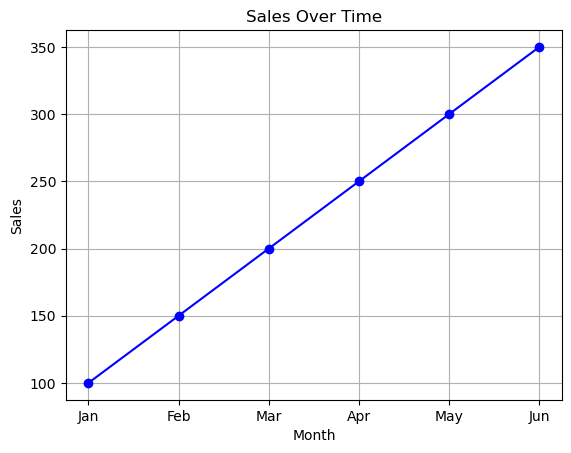

In [38]:
# Sample data
data = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Sales': [100, 150, 200, 250, 300, 350]
})

# Create a line plot
plt.plot(data['Month'], data['Sales'], marker='o', color='b')
plt.title('Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Example 2: Bar Chart

A bar chart is used to compare quantities for different categories. It is ideal for categorical data.

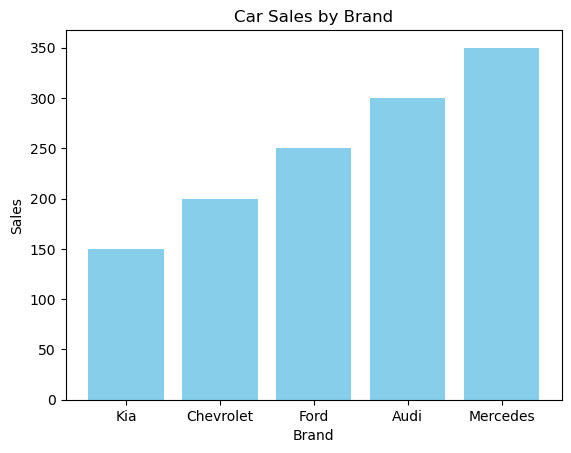

In [40]:
# Sample data
brands = ['Kia', 'Chevrolet', 'Ford', 'Audi', 'Mercedes']
sales = [150, 200, 250, 300, 350]

# Create a bar chart
plt.bar(brands, sales, color='skyblue')
plt.title('Car Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Sales')
plt.show()


3. Visualizing Distributions

Example 3: Histogram
A histogram shows the frequency distribution of a numeric variable. It is useful for understanding the distribution of a dataset.



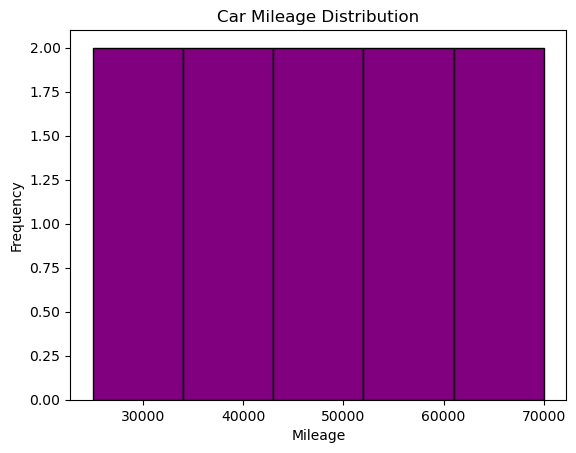

In [42]:
# Sample data
data = pd.DataFrame({
    'Mileage': [25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000]
})

# Create a histogram
plt.hist(data['Mileage'], bins=5, color='purple', edgecolor='black')
plt.title('Car Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()


4. Visualizing Relationships Between Variables
   
Example 4: Scatter Plot
A scatter plot is useful for identifying relationships or correlations between two numeric variables.

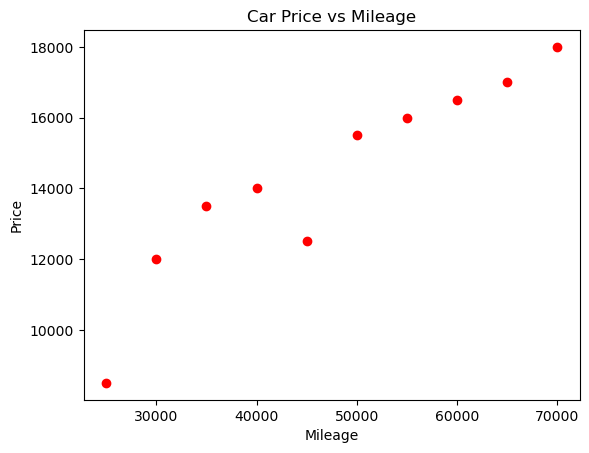

In [44]:
# Sample data
data = pd.DataFrame({
    'Mileage': [25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000],
    'Price': [8500, 12000, 13500, 14000, 12500, 15500, 16000, 16500, 17000, 18000]
})

# Create a scatter plot
plt.scatter(data['Mileage'], data['Price'], color='red')
plt.title('Car Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


5. Using Seaborn for Advanced Visualizations

Seaborn is a powerful visualization library built on top of Matplotlib. It simplifies the creation of more complex and informative plots.

Example 5: Box Plot
A box plot provides a summary of a dataset by displaying its distribution based on five summary statistics (minimum, first quartile, median, third quartile, and maximum).


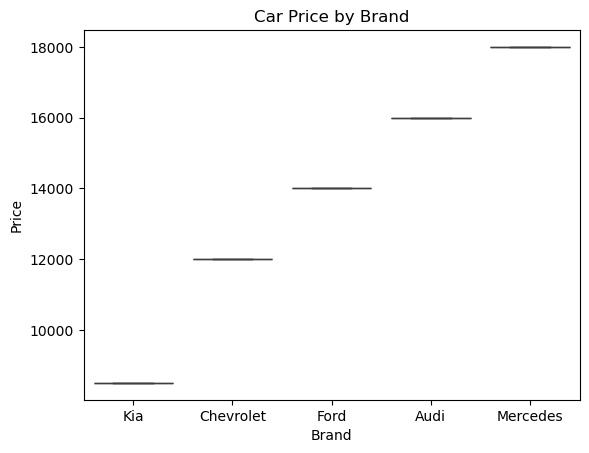

In [46]:
# Sample data
data = pd.DataFrame({
    'Brand': ['Kia', 'Chevrolet', 'Ford', 'Audi', 'Mercedes'],
    'Price': [8500, 12000, 14000, 16000, 18000]
})

# Create a box plot
sns.boxplot(x='Brand', y='Price', data=data)
plt.title('Car Price by Brand')
plt.show()


Example 6: Heatmap

A heatmap is used to display the correlation matrix or visualize data in a matrix format, with colors representing values.

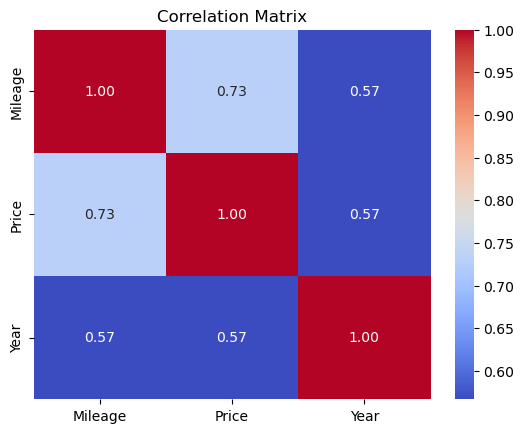

In [48]:
# Sample data
data = pd.DataFrame({
    'Mileage': [25000, 30000, 35000, 40000, 45000],
    'Price': [8500, 12000, 13500, 14000, 12500],
    'Year': [2020, 2021, 2020, 2022, 2021]
})

# Compute correlation matrix
corr_matrix = data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Step 8: Feature Engineering
Feature Engineering is the process of transforming raw data into features that better represent the underlying patterns in the data for predictive models. It plays a crucial role in improving model performance by helping the model learn better from the data.

In this step, we will explore various techniques of feature engineering, such as creating new features, encoding categorical variables, and scaling numerical features.



## 1. Creating New Features
Sometimes, combining or transforming existing features can create new, more informative ones.

### Example 1: Extracting Date Features
If your dataset includes date information, you can extract useful features like the year, month, day, etc.

In [51]:
# Sample data with a 'date' column
data = pd.DataFrame({
    'Date': ['2020-01-01', '2021-02-15', '2022-03-30']
})

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract new features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday

print(data)


        Date  Year  Month  Day  Weekday
0 2020-01-01  2020      1    1        2
1 2021-02-15  2021      2   15        0
2 2022-03-30  2022      3   30        2


### Example 2: Creating Interaction Features
Sometimes, you may want to create new features that capture the interaction between existing features.

In [53]:
# Sample data
data = pd.DataFrame({
    'Mileage': [25000, 30000, 35000, 40000],
    'Year': [2020, 2021, 2022, 2023],
})

# Create a new feature that combines 'Mileage' and 'Year'
data['Mileage_per_Year'] = data['Mileage'] / (2023 - data['Year'])
print(data)
# In this example, we created a feature Mileage_per_Year by dividing 
#the Mileage by the number of years from the car's manufacture year to the current year.

   Mileage  Year  Mileage_per_Year
0    25000  2020      8.333333e+03
1    30000  2021      1.500000e+04
2    35000  2022      3.500000e+04
3    40000  2023               inf


In [5]:
# Reade the data from the stored directory
import pandas as pd
data=pd.read_csv("/home/compess/Desktop/Principle of Data science/carpricedatset.zip")
# Methode to diaplay the first 5 rows
print(data) 

           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3            5   8501  
1        5356